In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize']=(20,6)

In [5]:
ph_sales = pd.read_csv('datasets/h02.csv', header = None)

In [29]:
ph_sales.head()


,1
0,
1991-07,0.429795
1991-08,0.400906
1991-09,0.432159
1991-10,0.492543
1991-11,0.502369


In [12]:
ph_sales.set_index(0, inplace = True
                  )

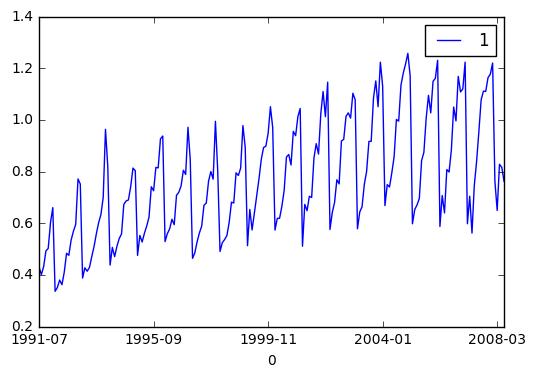

In [13]:
ph_sales.plot()

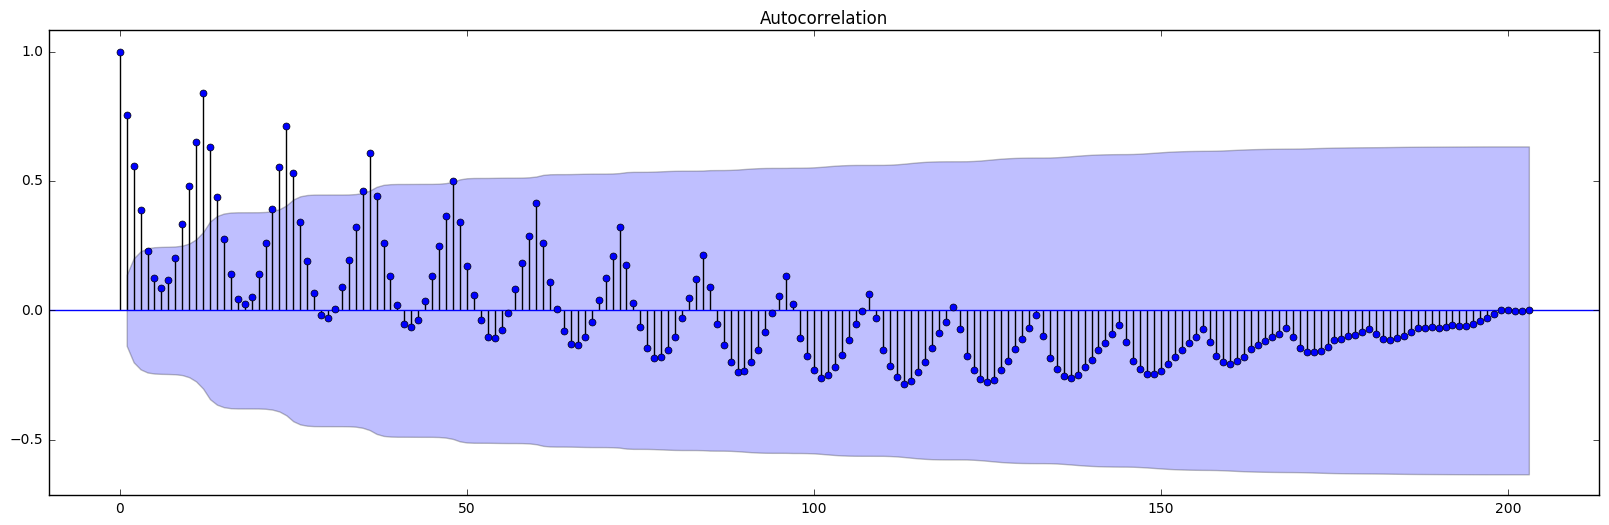

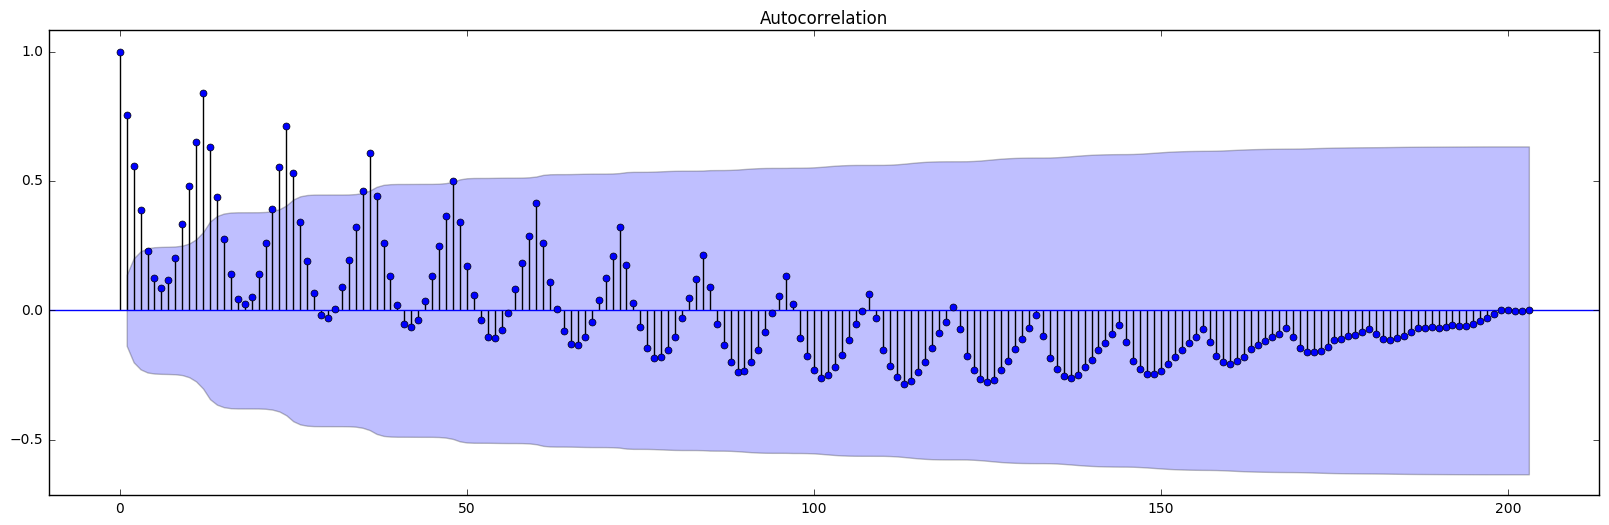

In [19]:
plot_acf(ph_sales)

In [23]:
ph_sales_diff = ph_sales.diff(periods =12)

Figure(1440x432)


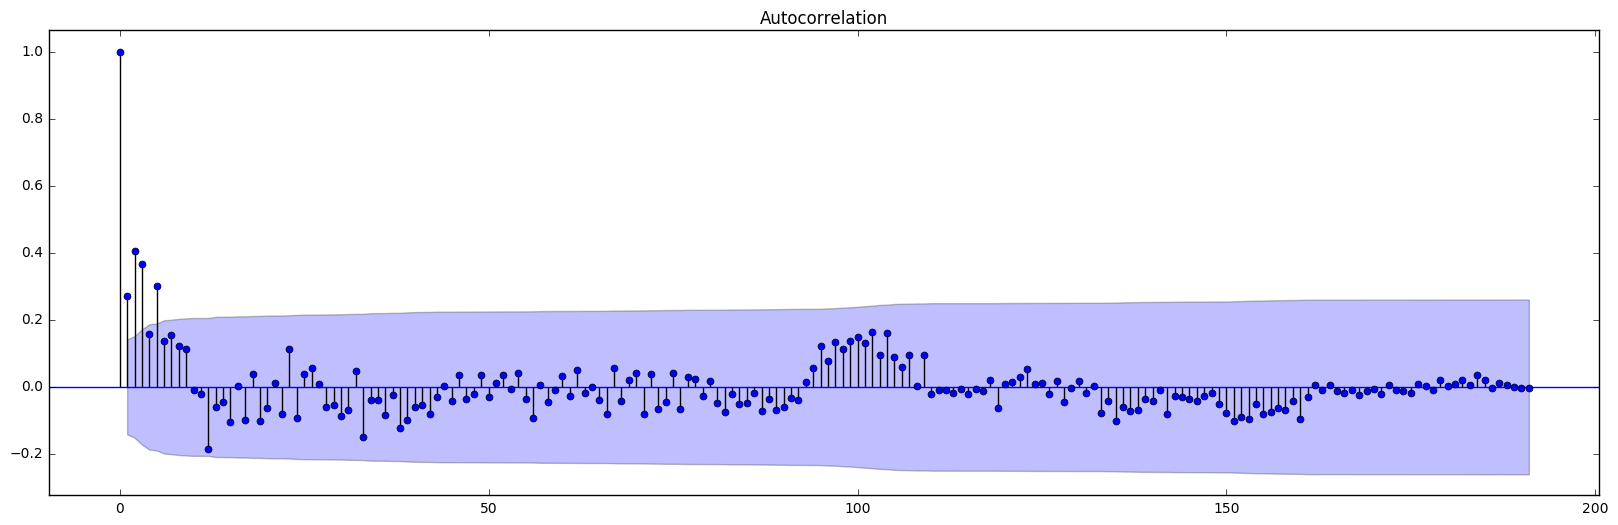

In [25]:
print plot_acf(ph_sales_diff[12:
                            ])

Figure(1440x432)


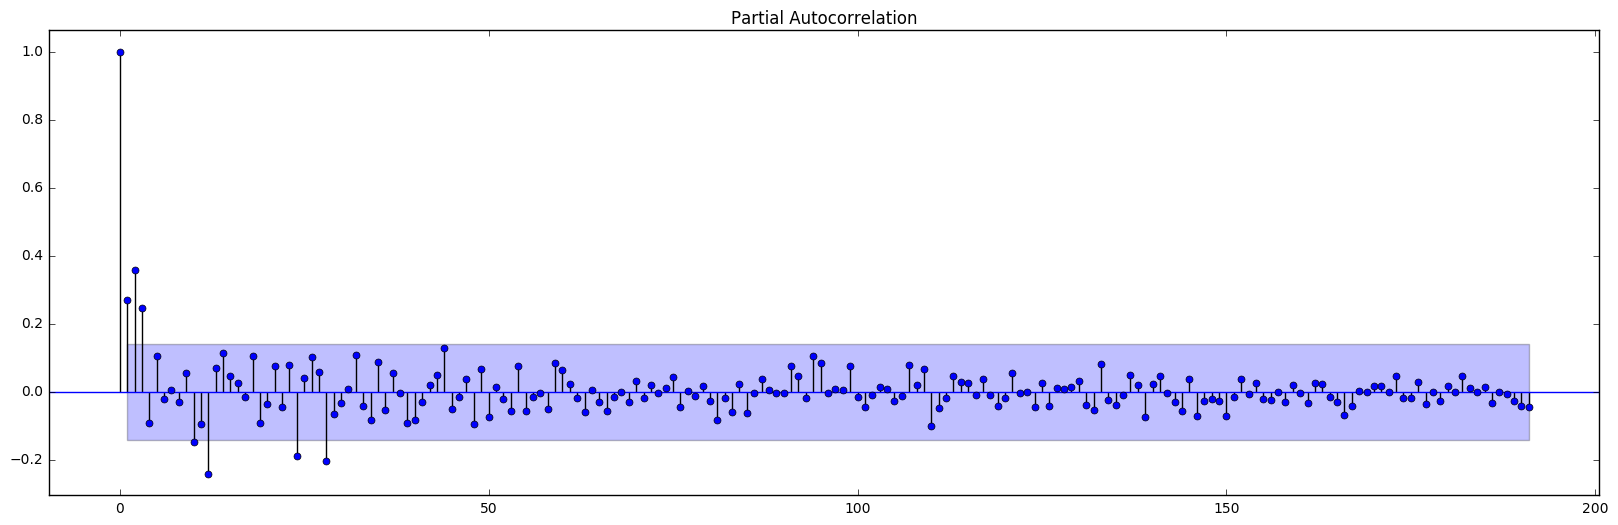

In [26]:
print plot_pacf(ph_sales_diff[12:])

In [53]:
import statsmodels.api as sm
data = ph_sales
model = sm.tsa.statespace.SARIMAX(data, order=(3,0,2), seasonal_order=(2,1,1,12), trend='c')
results = model.fit()
results.summary()


//anaconda/envs/statsmodeldevenv/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.7-x86_64.egg/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  1   No. Observations:                  204
Model:             SARIMAX(3, 0, 2)x(2, 1, 1, 12)   Log Likelihood                 291.505
Date:                            Fri, 23 Dec 2016   AIC                           -565.010
Time:                                    15:23:10   BIC                           -535.147
Sample:                                07-01-1991   HQIC                          -552.930
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2811      0.130     -2.166      0.030      -0.535      -0.027
ar.L2          0.5895      0.109      5.402      0.000       0.376       0.803
ar.L3          0.5427      0.087      6.258      0.000       0.373       0.713
ma.L1          0.4801      0.144      3.339      0.001       0.198       0.762
ma.L2         -0.0709      0.145     -0.488      0.625      -0.355       0.214
ar.S.L12      -0.0749      0.204     -0.367      0.714      -0.476       0.326
ar.S.L24      -0.2290      0.123     -1.862      0.063      -0.470       0.012
ma.S.L12      -0.3833      0.211     -1.813      0.070      -0.797       0.031
sigma2         0.0027      0.000     10.466      0.000       0.002       0.003
===================================================================================
Ljung-Box (Q):                       63.17   Jarque-Bera (JB):                 3.36
Prob(Q):                              0.01   Prob(JB):                         0.19
Heteroskedasticity (H):               2.03   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
residuals = results.resid

Figure(1440x432)
Figure(1440x432)


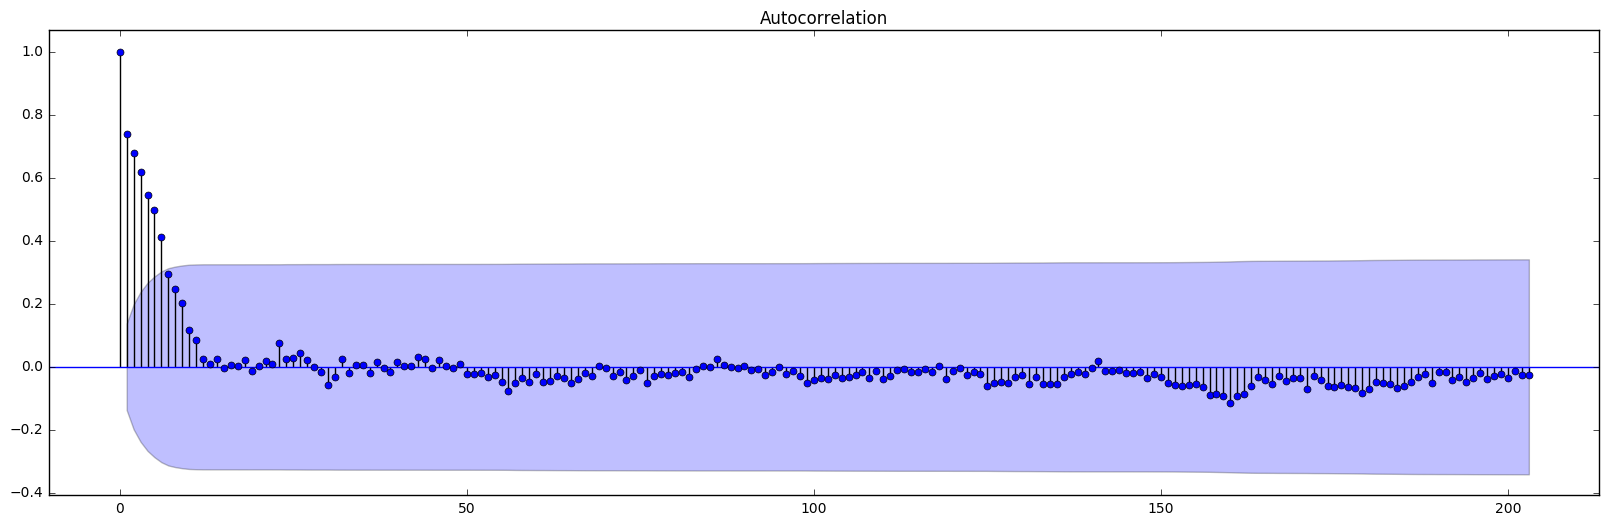

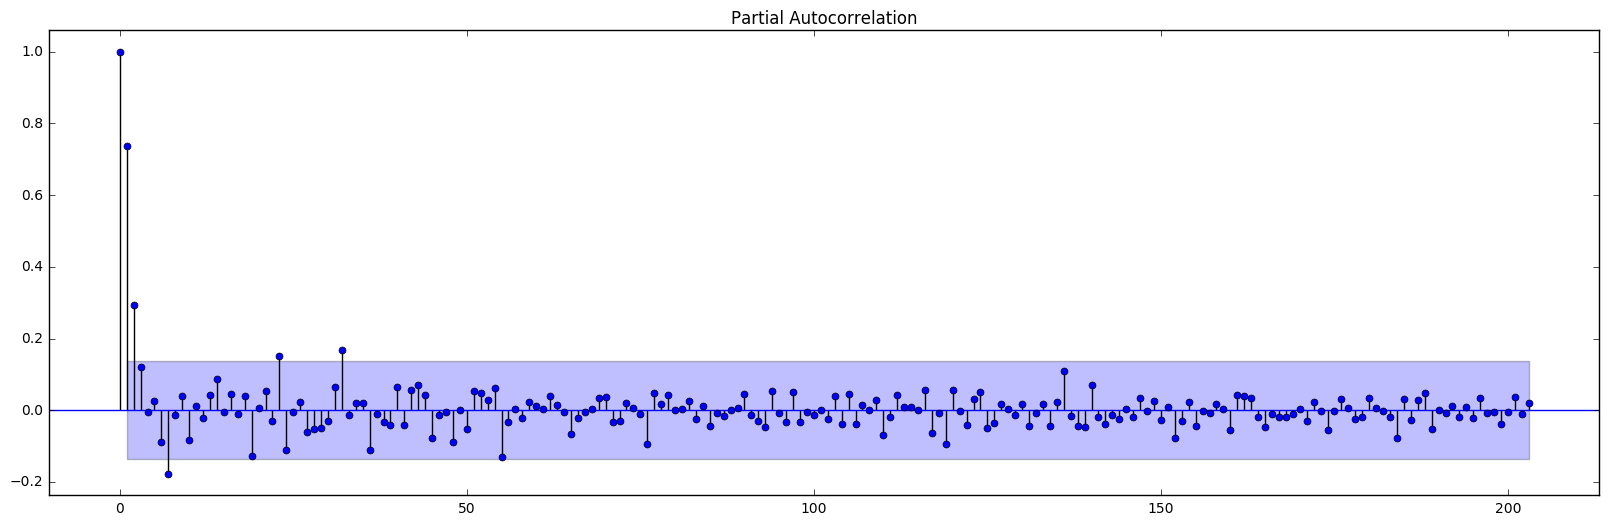

In [50]:
print plot_acf(residuals)
print plot_pacf(residuals)

In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags = min(24, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)

(array([ 112.47316686,  207.95891367,  288.21587442,  350.4600493 ,
         402.98783417,  438.78060961,  457.19065856,  470.09824208,
         478.93641056,  481.9414976 ,  483.46518486,  483.60649615,
         483.62213723,  483.75412555,  483.75565385,  483.762816  ,
         483.76473371,  483.88681275,  483.92414974,  483.92755275,
         483.99383122,  484.01569093,  485.34852351,  485.47696809]),
 array([  2.81448347e-26,   6.95497647e-46,   3.53196306e-62,
          1.39523426e-74,   6.73425274e-85,   1.27457430e-91,
          1.26810959e-94,   1.82113909e-96,   1.85511319e-97,
          3.18140147e-97,   1.07435328e-96,   6.81316871e-96,
          4.39173834e-95,   2.56581006e-94,   1.53750322e-93,
          8.86595112e-93,   4.95770639e-92,   2.53538280e-91,
          1.31192477e-90,   6.71193636e-90,   3.24525396e-89,
          1.56353055e-88,   3.92876589e-88,   1.71963955e-87]))